##Building CNN model to detect Melanoma

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [4]:
#working on Google colab and connecting the drive 
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Importing all the important libraries

In [5]:
#importing the libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import LayerNormalization
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

##Data Reading/Data Understanding

In [6]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
root_path = '/content/gdrive/MyDrive/ML/CNN'
data_dir_train = pathlib.Path(root_path + '/Train')
data_dir_test = pathlib.Path(root_path + '/Test')

In [7]:
#getting the image counts for train and test
img_cnt_train = len(list(data_dir_train.glob('*/*.jpg')))
print(img_cnt_train)
img_cnt_test = len(list(data_dir_test.glob('*/*.jpg')))
print(img_cnt_test)

2239
118


###Create a dataset

In [8]:
#defining the parameters
batch_size = 32
img_height = 180
img_width = 180

In [9]:
#Using 80% of the images for training, and 20% for validation.
#using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
#resizing the images to the size img_height*img_width, while writting the dataset

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
#Using 80% of the images for training, and 20% for validation.
#using seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
#resizing the images to the size img_height*img_width, while writting the dataset

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
#listing all the classes of skin cancer and storing them in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


##Dataset Visualization

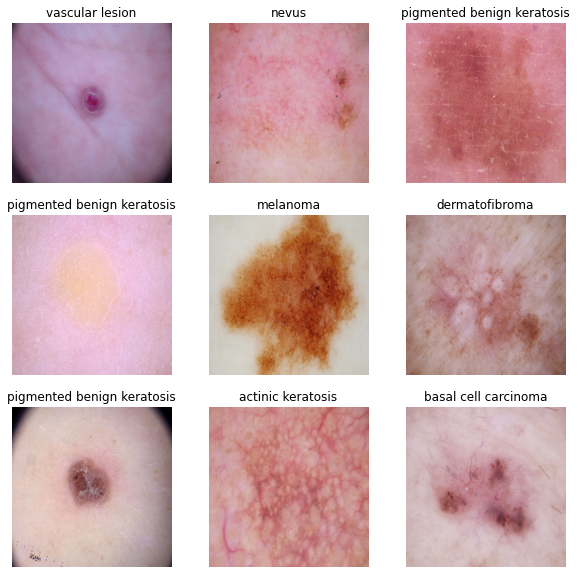

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [13]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

##Model Building & training

In [14]:
#model
num_classes = len(class_names)
# a keras convolutional layer is called Conv2D

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


Compile the model

In [15]:
# usual cross entropy loss
# choose optimiser as adam
# metric is accuracy
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
#model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

Train the model

In [17]:
# fit the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 201s 791ms/step - loss: 2.0379 - accuracy: 0.2567 - val_loss: 1.9528 - val_accuracy: 0.2506
Epoch 2/20
56/56 [==============================] - 1s 25ms/step - loss: 1.7675 - accuracy: 0.3583 - val_loss: 1.6864 - val_accuracy: 0.3691
Epoch 3/20
56/56 [==============================] - 1s 25ms/step - loss: 1.5570 - accuracy: 0.4464 - val_loss: 1.6102 - val_accuracy: 0.4497
Epoch 4/20
56/56 [==============================] - 1s 24ms/step - loss: 1.4375 - accuracy: 0.4866 - val_loss: 1.3972 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 1s 24ms/step - loss: 1.2870 - accuracy: 0.5419 - val_loss: 1.4033 - val_accuracy: 0.5324
Epoch 6/20
56/56 [==============================] - 1s 25ms/step - loss: 1.2806 - accuracy: 0.5463 - val_loss: 1.4316 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 1s 24ms/step - loss: 1.1331 - accuracy: 0.6004 - val_loss: 1.3320 - val_accuracy: 0.5436
Epoch 8/20

Visualizing training results

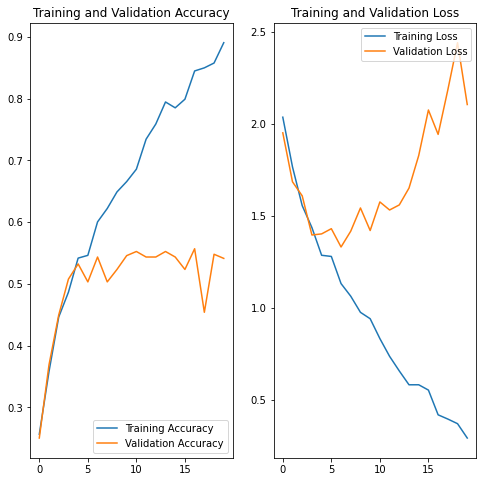

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

My Observations:

* The training accuracy is over 90% where as the validation accuracy is 55%

* The Training loss is 0.3 where as the validation loss is 2.2

* Above graph tells the training accuracy is continuously increasing after each epochs but the validation accuracy is not increasing after cetain point.

* Above graph also tells the training loss is continuously decresing after each epochs but the validation loss reduced till some point and continously increased after certain point.

* This clearly tell there is overfit in the model and need aufmentation strategy.

##Data Augmentation to resolve overfitting

In [19]:
data_augmentation = keras.Sequential(
    [
     layers.experimental.preprocessing.RandomFlip("horizontal",
                                                  input_shape=(img_height, img_width, 3)),
     layers.experimental.preprocessing.RandomRotation(0.1),
     layers.experimental.preprocessing.RandomZoom(0.1)
    ]
)

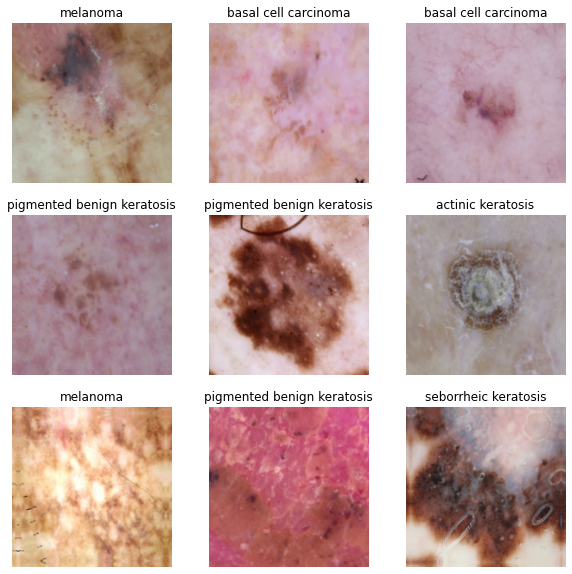

In [20]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax= plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

##Model Building & training

In [21]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Compiling the model

In [22]:
model.compile(optimizer= 'adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Training the model

In [23]:
epochs = 20
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 3s 30ms/step - loss: 2.0115 - accuracy: 0.2573 - val_loss: 1.8321 - val_accuracy: 0.3221
Epoch 2/20
56/56 [==============================] - 1s 26ms/step - loss: 1.7830 - accuracy: 0.3387 - val_loss: 1.6182 - val_accuracy: 0.3960
Epoch 3/20
56/56 [==============================] - 1s 26ms/step - loss: 1.6622 - accuracy: 0.3962 - val_loss: 1.5749 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 1s 26ms/step - loss: 1.5832 - accuracy: 0.4403 - val_loss: 1.5128 - val_accuracy: 0.4832
Epoch 5/20
56/56 [==============================] - 1s 26ms/step - loss: 1.4905 - accuracy: 0.4849 - val_loss: 1.4501 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 2s 33ms/step - loss: 1.4096 - accuracy: 0.5073 - val_loss: 1.3693 - val_accuracy: 0.5101
Epoch 7/20
56/56 [==============================] - 2s 36ms/step - loss: 1.3504 - accuracy: 0.5223 - val_loss: 1.4480 - val_accuracy: 0.4944
Epoch 8/20
56

Visualizing the results

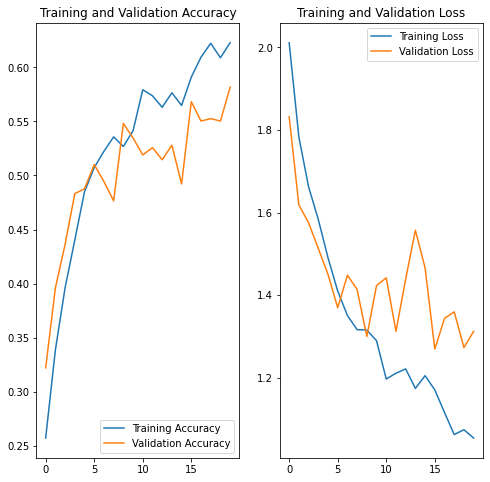

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##Class distribution

<Figure size 576x432 with 0 Axes>

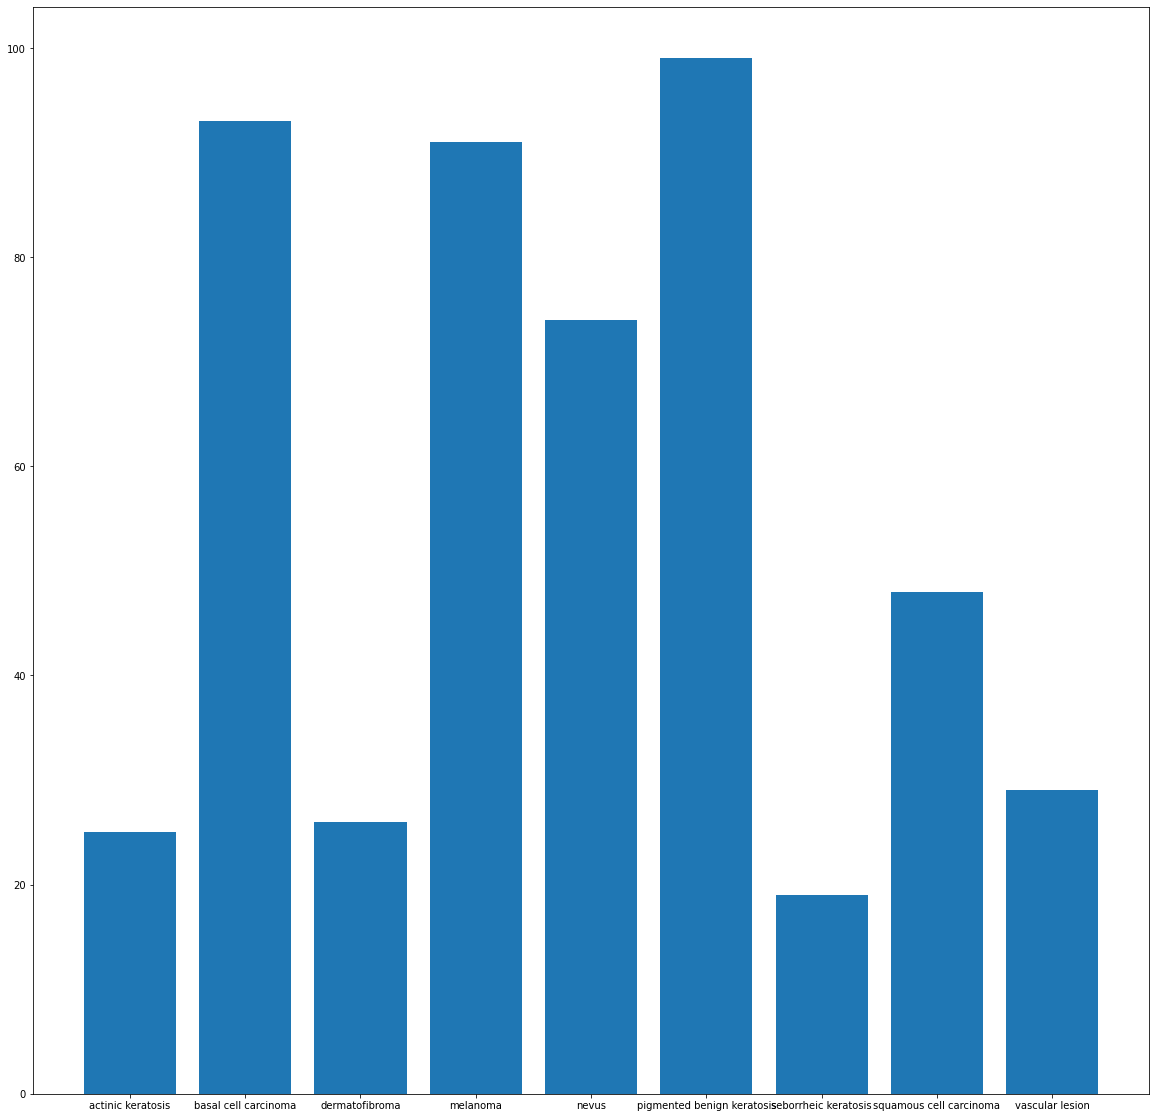

In [ ]:
import matplotlib.pyplot as plt
data = dict()

for i in class_names:
  data[i] = []

plt.figure(figsize=(8, 6))
for images, labels in train_ds:
  for i in range(9):
    data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

for i in data:
  data[i] = len(data[i]) 

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

plt.bar(range(len(data)), list(data.values()), align='center')
plt.xticks(range(len(data)), list(data.keys()))
plt.show()

- Which class has the least number of samples? - **Actinic Keratosos and Seborrheic keratosis**
- Which classes dominate the data in terms proportionate number of samples? **Pigmented benign keratosis dominates the data in terms proportionate number of samples.**

##Handling class imbalances

In [25]:
!pip install Augmentor

To use Augmentor, the following general procedure is followed:

1. Instantiate a Pipeline object pointing to a directory containing your initial image data set.
2. Define a number of operations to perform on this data set using your Pipeline object.
3. Execute these operations by calling the Pipeline’s sample() method.

In [26]:
path_to_training_dataset="/content/gdrive/MyDrive/ML/CNN/Train/"
# data_dir_train = pathlib.Path(root_path + '/Train')
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500, multi_threaded=False) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/actinic keratosis/output.

Processing ISIC_0029900.jpg: 100%|██████████| 500/500 [00:38<00:00, 13.10 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/basal cell carcinoma/output.

Processing ISIC_0025601.jpg: 100%|██████████| 500/500 [00:29<00:00, 17.24 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/dermatofibroma/output.

Processing ISIC_0031827.jpg: 100%|██████████| 500/500 [00:29<00:00, 17.13 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/melanoma/output.

Processing ISIC_0000404.jpg: 100%|██████████| 500/500 [02:04<00:00,  4.01 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/nevus/output.

Processing ISIC_0000357.jpg: 100%|██████████| 500/500 [01:56<00:00,  4.28 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/pigmented benign keratosis/output.

Processing ISIC_0027083.jpg: 100%|██████████| 500/500 [00:28<00:00, 17.43 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/seborrheic keratosis/output.

Processing ISIC_0011039.jpg: 100%|██████████| 500/500 [01:03<00:00,  7.84 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/squamous cell carcinoma/output.

Processing ISIC_0025712.jpg: 100%|██████████| 500/500 [00:26<00:00, 18.87 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/ML/CNN/Train/vascular lesion/output.

Processing ISIC_0025250.jpg: 100%|██████████| 500/500 [00:28<00:00, 17.54 Samples/s]


In [27]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


Lets see the distribution of augmented data after adding new images to the original training data.

In [28]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
print(len(path_list))
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(path_list_new))

2239
4500


In [29]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(lesion_list_new)

['melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'melanoma', 'me

In [30]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))
dataframe_dict = dict(zip(path_list, lesion_list))

In [31]:
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [32]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

##Model Building & training

Train the model on the data created using Augmentor

In [33]:
batch_size = 32
img_height = 180
img_width = 180

Create a training dataset

In [34]:
data_dir_train=pathlib.Path("/content/gdrive/MyDrive/ML/CNN/Train/")
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


Create a validation dataset

In [35]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


Create CNN model (including normalization)

In [36]:
model = Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.BatchNormalization(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

Compile your model (choose optimizer and loss function appropriately)

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [38]:
epochs = 50
history = model.fit(train_ds, 
                    validation_data=val_ds, 
                    epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 32s 178ms/step - loss: 2.4922 - accuracy: 0.2374 - val_loss: 5.8471 - val_accuracy: 0.1084
Epoch 2/50
169/169 [==============================] - 29s 169ms/step - loss: 1.9163 - accuracy: 0.2637 - val_loss: 3.2117 - val_accuracy: 0.1062
Epoch 3/50
169/169 [==============================] - 29s 167ms/step - loss: 1.8904 - accuracy: 0.2717 - val_loss: 2.2618 - val_accuracy: 0.2168
Epoch 4/50
169/169 [==============================] - 29s 167ms/step - loss: 1.8204 - accuracy: 0.2876 - val_loss: 2.0762 - val_accuracy: 0.1975
Epoch 5/50
169/169 [==============================] - 30s 170ms/step - loss: 1.7879 - accuracy: 0.2945 - val_loss: 2.0098 - val_accuracy: 0.2539
Epoch 6/50
169/169 [==============================] - 29s 168ms/step - loss: 1.7564 - accuracy: 0.2934 - val_loss: 2.3010 - val_accuracy: 0.2450
Epoch 7/50
169/169 [==============================] - 29s 167ms/step - loss: 1.6965 - accuracy: 0.3409 - val_loss: 1.6840 - val_ac

Visualize the model results

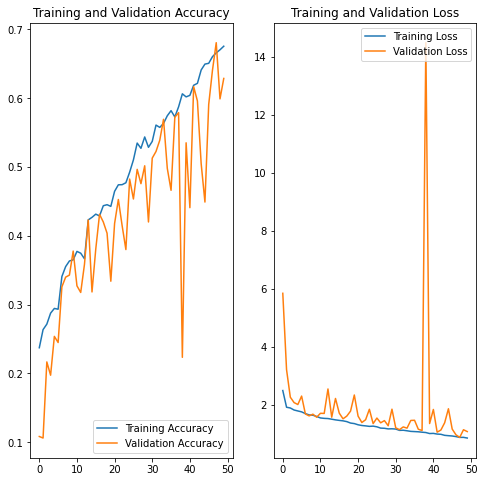

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?

- The above graph shows we have better model.
- The Training accuracy and Validation accuracy before and after is improved. 
- The Training Loss and Validation loss is decreased gradually.
- Tried Batch Normalization and Augmentation to improve the model accuracy and get rid of overfitting.